# Objectifs du jour : Prise en main de scikit-learn

- Aller sur la page de la documentation et regarder l'organisation de la page.
- Regarder la distinction entre régression et classification 
- Regarder l'API communes de tous les modèles.
- Re produire l'entraînement déjà effectué.
- En utilisant :
    - LinearRegression
    - RidgeRegression
    - Lasso
    - ElasticNet
    - KNeighborsRegressor
    - SVR
    - RandomForestRegressor
    - MLPRegressor
    - KernelRidge

## Rapide prise en main de sklearn

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
from sklearn.pipeline import Pipeline

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.model_selection import cross_val_score

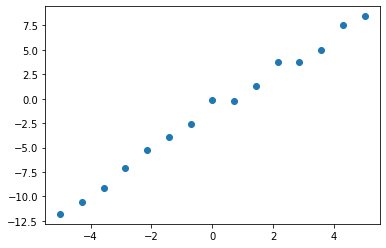

In [10]:
x = np.linspace(-5, 5, 15)
y = 2 * x - 1.5 + np.random.randn(15) * 0.5
plt.scatter(x,y)

In [11]:
modele = LinearRegression()

In [12]:
dir(modele)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'score',
 'set_params']

In [13]:
X = x.reshape(-1, 1)
X

array([[-5.        ],
       [-4.28571429],
       [-3.57142857],
       [-2.85714286],
       [-2.14285714],
       [-1.42857143],
       [-0.71428571],
       [ 0.        ],
       [ 0.71428571],
       [ 1.42857143],
       [ 2.14285714],
       [ 2.85714286],
       [ 3.57142857],
       [ 4.28571429],
       [ 5.        ]])

In [14]:
modele.fit(X, y)

LinearRegression()

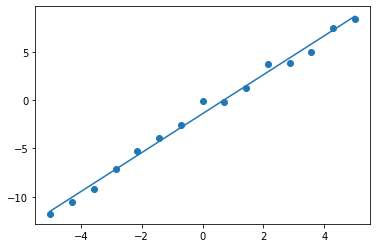

In [15]:
x_aff = np.linspace(-5, 5, 1000)
y_aff = modele.predict(x_aff.reshape(-1, 1))
plt.plot(x_aff, y_aff)
plt.scatter(x, y)

Trouver pour chaque commande qui suit la signification de l'output. Parcourir la documentation de Sklearn.

In [16]:
modele.coef_

array([2.01863206])

In [17]:
modele.intercept_

-1.3928994594703885

In [18]:
modele.score(X, y)

0.9920106407158608

In [19]:
modele.score(x_aff.reshape(-1, 1), 2 * x_aff.reshape(-1, 1) -1.5)
# On fait quoi ?

0.9995697833754801

In [20]:
modele.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

## Apprentissage polynomial

In [21]:
gauche = -1.
droite = 2.
nb_points = 30

def cible(x):
    return np.exp(1 / (2 + np.cos(7 * x) * np.sin(20 * x)))

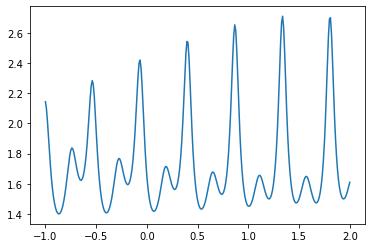

In [22]:
x_aff = np.linspace(gauche, droite, 300)
y_aff = cible(x_aff)
plt.plot(x_aff, y_aff)

In [23]:
x = np.random.uniform(low=gauche, high=droite, size=(nb_points, 1))
x

array([[ 0.81659209],
       [-0.35353069],
       [-0.16783218],
       [ 0.44360848],
       [ 1.68749066],
       [ 1.7440756 ],
       [-0.67854511],
       [ 0.8358826 ],
       [-0.6978444 ],
       [ 1.5144439 ],
       [ 1.93878298],
       [-0.09236324],
       [ 0.32845187],
       [-0.78252721],
       [ 0.2947413 ],
       [ 0.25891323],
       [ 1.22755218],
       [-0.62028411],
       [-0.22023333],
       [ 1.04779395],
       [-0.44491605],
       [-0.391687  ],
       [ 0.94834154],
       [-0.1778606 ],
       [-0.25378015],
       [ 0.53177331],
       [ 0.25460327],
       [ 1.66019752],
       [-0.26446096],
       [ 1.20541821]])

(30, 1) (30, 1)


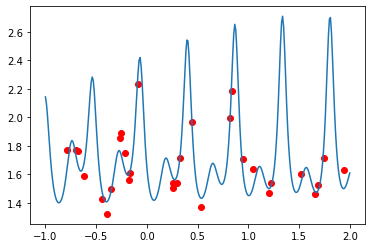

In [24]:
y = cible(x) + np.random.normal(size=x.shape) * 0.1
x_aff = np.linspace(gauche, droite, 300)
y_aff = cible(x_aff)
plt.plot(x_aff, y_aff)
print(x.shape, y.shape)
plt.scatter(x, y, color="red")

In [25]:
modele_bateau = LinearRegression()
modele_bateau.fit(x, y)

LinearRegression()

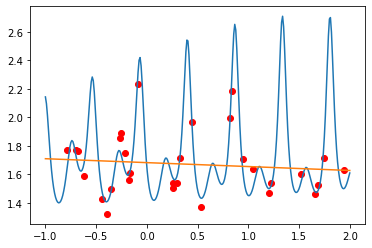

In [26]:
plt.plot(x_aff, y_aff)
plt.scatter(x, y, color="red")
plt.plot(x_aff, modele_bateau.predict(x_aff.reshape(-1, 1)))

In [27]:
modele_bateau.score(x, y)

0.010648189774798866

In [28]:
modele_bateau.score(x_aff.reshape(-1, 1), y_aff)

-0.06576421500546159

**REMARQUE** l'apprentissage polynomial est en fait une régression linéaire sur un X possédant des "features" supplémentaires qui sont les puissances successives de x.

In [29]:
polynome = PolynomialFeatures(degree=2)

In [30]:
X = polynome.fit_transform(x)
# On fait quoi ?
X

array([[ 1.        ,  0.81659209,  0.66682265],
       [ 1.        , -0.35353069,  0.12498395],
       [ 1.        , -0.16783218,  0.02816764],
       [ 1.        ,  0.44360848,  0.19678849],
       [ 1.        ,  1.68749066,  2.84762474],
       [ 1.        ,  1.7440756 ,  3.0417997 ],
       [ 1.        , -0.67854511,  0.46042346],
       [ 1.        ,  0.8358826 ,  0.69869972],
       [ 1.        , -0.6978444 ,  0.4869868 ],
       [ 1.        ,  1.5144439 ,  2.29354033],
       [ 1.        ,  1.93878298,  3.75887946],
       [ 1.        , -0.09236324,  0.00853097],
       [ 1.        ,  0.32845187,  0.10788063],
       [ 1.        , -0.78252721,  0.61234883],
       [ 1.        ,  0.2947413 ,  0.08687244],
       [ 1.        ,  0.25891323,  0.06703606],
       [ 1.        ,  1.22755218,  1.50688434],
       [ 1.        , -0.62028411,  0.38475237],
       [ 1.        , -0.22023333,  0.04850272],
       [ 1.        ,  1.04779395,  1.09787216],
       [ 1.        , -0.44491605,  0.197

In [31]:
modele = LinearRegression(fit_intercept=False)
modele.fit(X, y)

LinearRegression(fit_intercept=False)

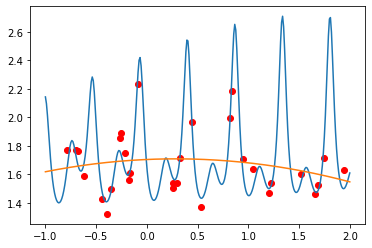

In [33]:
plt.plot(x_aff, y_aff)
plt.scatter(x, y, color="red")
plt.plot(x_aff, modele.predict(polynome.transform(x_aff.reshape(-1, 1))))

In [34]:
tuyau = Pipeline(
    steps=[
        ("Generation puissances", PolynomialFeatures(degree=2)),
        ("Régression linéaire", LinearRegression(fit_intercept=False))
    ]
)

In [35]:
dir(tuyau)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_is_fitted__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_can_inverse_transform',
 '_can_transform',
 '_check_feature_names',
 '_check_fit_params',
 '_check_n_features',
 '_estimator_type',
 '_final_estimator',
 '_fit',
 '_get_param_names',
 '_get_params',
 '_get_tags',
 '_iter',
 '_log_message',
 '_more_tags',
 '_pairwise',
 '_replace_estimator',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_params',
 '_sk_visual_block_',
 '_validate_data',
 '_validate_names',
 '_validate_steps',
 'classe

In [36]:
tuyau.fit(x, y)

Pipeline(steps=[('Generation puissances', PolynomialFeatures()),
                ('Régression linéaire', LinearRegression(fit_intercept=False))])

In [37]:
tuyau.score(x, y)

0.03172154051345677

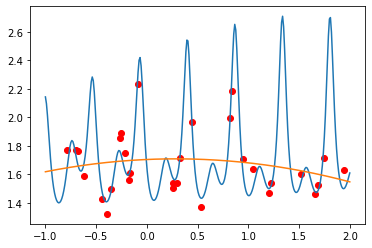

In [38]:
plt.plot(x_aff, y_aff)
plt.scatter(x, y, color = "red")
plt.plot(x_aff, tuyau.predict(x_aff.reshape(-1, 1)))

**QUESTION** afficher la courbe des scores d'apprentissages et d'affichage par rapport au degrés du polynom.

In [40]:
def courbe_apprentissage(degres: list[int], cible=cible, nb_points: int = 30):
    gauche = -1.
    droite = 2.
    #x = np.random.uniform(low=gauche, high=droite, size=(nb_points, 1))
    x = np.linspace(gauche, droite, nb_points).reshape(-1, 1)
    y = cible(x) + np.random.normal(size=x.shape) * 0.1
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
    scores_test = list()
    scores_app = list()
    for degre in degres:
        tuyau = Pipeline(
            steps=[
                ("Normalisation", MinMaxScaler(feature_range=(-0.9, 0.9))),
                ("Generation puissances", PolynomialFeatures(degree=degre)),
                ("Régression linéaire", LinearRegression(fit_intercept=False)),
            ]
        )
        tuyau.fit(x_train, y_train)
        scores_app.append(tuyau.score(x_train, y_train))
        scores_test.append(tuyau.score(x_test, y_test))
        
    fig, rep = plt.subplots(figsize=(12, 8))
    rep.plot(degres, scores_app, label="apprentissage")
    rep.plot(degres, scores_test, label="test")
    rep.set_ylim(-1.1, 1.1)
    rep.legend()
        

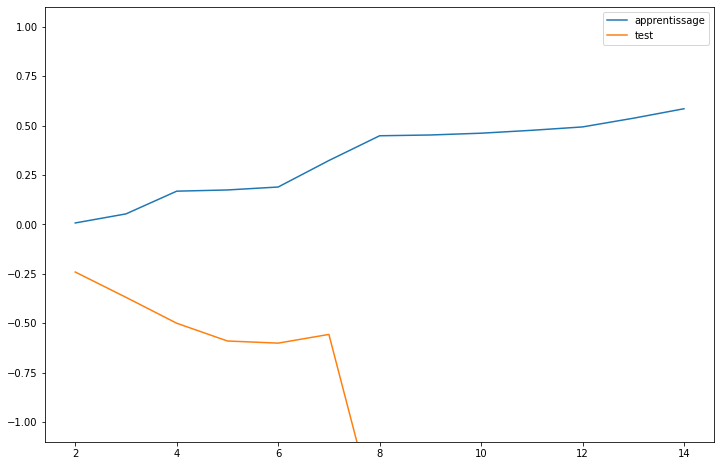

In [41]:
courbe_apprentissage(degres=[d for d in range(2, 15)])

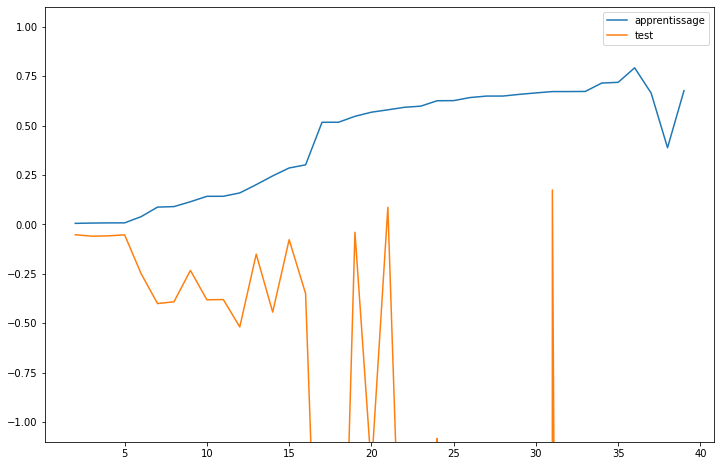

In [42]:
courbe_apprentissage(degres=[d for d in range(2, 40)], nb_points=100)

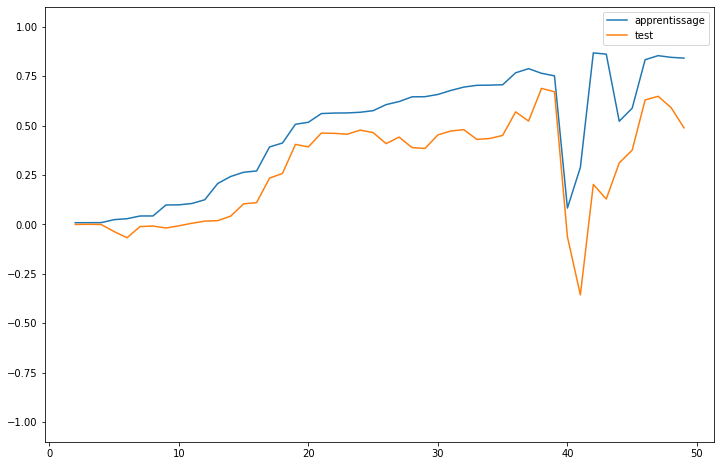

In [43]:
courbe_apprentissage(degres=[d for d in range(2, 50)], nb_points=200)

**QUESTION** utiliser `cross_val_score` pour sélectionner le meilleur modèle par rapport au degré et à la normalisation en utilisant juste l'échantillon d'entrainement. Utiliser ensuite l'échantillon de test pour détecter s'il est en surapprentissage.